<a href="https://colab.research.google.com/github/htapiagroup/sistdist/blob/master/MCA_SDU_S4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Distribuidos y Ubicuos II 

## MCA Tercer cuatrimestre

### Horacio Tapia-McClung


# Resumen Semana 3

* Usamos Dask para represetnar matrices y realizar calculos de agregacion como promedios, valores minimos, maximos, etc.

# Semana 4

Vamos a trabajar un poco en la paralelizacion de codigo usando `@delayed`

In [0]:
from time import sleep

def inc(x):
  sleep(1)
  return x + 1

def suma(x, y):
  sleep(1)
  return x + y

In [4]:
%%time

x = inc(1)
y = inc(2)
z = suma(x, y)

CPU times: user 1.38 ms, sys: 76 µs, total: 1.45 ms
Wall time: 3 s


In [0]:
from dask import delayed

In [5]:
%%time

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(suma)(x, y)

CPU times: user 728 µs, sys: 0 ns, total: 728 µs
Wall time: 620 µs


In [6]:
%%time

z.compute()

CPU times: user 7.4 ms, sys: 1.08 ms, total: 8.47 ms
Wall time: 2.01 s


5

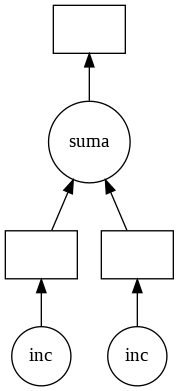

In [7]:
z.visualize()

In [0]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [9]:
%%time

resultados = []
for x in data:
  y = inc(x)
  resultados.append(y)
 
total = sum(resultados)

CPU times: user 9.1 ms, sys: 868 µs, total: 9.96 ms
Wall time: 8.01 s


In [10]:
total

44

In [11]:
%%time

resultados = []

for x in data:
  y = delayed(inc)(x)
  resultados.append(y)
 
total = delayed(sum)(resultados)
print(total.compute())

44
CPU times: user 10.4 ms, sys: 1.86 ms, total: 12.2 ms
Wall time: 4.01 s
